In [1]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import random
import gensim
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

#metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#reading preprocessed file
df=pd.read_csv("final.csv")
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud- nice rhythm well ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [3]:
#taking 50k datapoints for brue approach

df_pos=df[df['Score']==1].sample(25000)
df_neg=df[df['Score']==0].sample(25000)
df_50k=pd.concat([df_pos,df_neg])
df_50k.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
313985,68043,73958,B004JRKEH4,AISSIRI0N0I57,Adam,0,0,1,1316044800,Delicious at home Taco Bell,After trying both the Chipotle as well as the ...,tri chipotl well spici ranchero sauc happi tac...
337078,483209,522469,B005EZJXVS,A3CUFOB7L6ZHAE,mamahall,0,0,1,1325894400,great snack for on the go,My children (ages 2 and 6) both love Strawberr...,children age 2 6 love strawberri puff great sn...
32801,426748,461515,B000BEZVW2,A1GHJ6YSR6SL5O,J. Crandall,0,0,1,1235779200,The best for a campfire cookout,Tired of missing out as a vegetarian during ca...,tire miss vegetarian campfir cookout well dog ...
262625,195229,211639,B0035N3ADS,AZV26LP92E6WU,"M. Hammond ""ColemanFlGuy""",2,4,1,1285804800,Ragu Pasta Sauce,My favorite one. I am very happy with this spa...,favorit one happi spaghetti sauc happi purchas...
106413,222108,240830,B000NBQUNW,A3GZH6KMR5MDB3,Melissa E. Lee,0,0,1,1249948800,My Doctor Recommended this product,My doctor recommended this product to lower my...,doctor recommend product lower cholestorol wor...


In [4]:
#taking 20k datapoints for kdtree approach

df_pos=df[df['Score']==1].sample(10000)
df_neg=df[df['Score']==0].sample(10000)
df_20k=pd.concat([df_pos,df_neg])
df_20k.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
263471,522108,564470,B0036Z3ULM,A1SH2LXCSNRKH4,gail robins,0,0,1,1284336000,Poppin' Good,Everything you want in popcorn. Pop big kerna...,everyth want popcorn pop big kernal without lo...
337347,327788,354777,B005FN2QWM,A8QTQOS2J5ASK,Marasta,0,0,1,1317686400,Amazing,The pickles remind me of the pickles my grandm...,pickl remind pickl grandmoth use make total am...
211181,31499,34296,B001P3NU30,A3US651GJPUGJ5,Robert W Brown,0,1,1,1321660800,Great Product at a Great Price,I've got 2 Golden Retrievers that stand at the...,ive got 2 golden retriev stand cabinet door di...
37447,362327,391850,B000CQBZPG,A3U943NERKD7E0,Michael Lee,0,0,1,1294099200,Powerful stuff,"The strong, spicy aroma (clove and cinnamon do...",strong spici aroma clove cinnamon domin make f...
260720,291457,315722,B0032OLLIG,A13VY0ZQM7QBAJ,"H. Chen ""haochen3d.com""",0,0,1,1348704000,The Mix Is Great.,First things first -- I don't remember seeing ...,first thing first -- dont rememb see sold pric...


In [5]:
#sorting by timestaamp
df_50k.sort_values("Time",inplace=True)
df_50k.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
427,417883,451903,B00004CXX9,A2DEE7F9XKP3ZR,jerome,0,1,1,959990400,Research,I'm getting crazy.<p>Is it really impossible t...,im get crazi realli imposs today find french v...
242,1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
425,417901,451923,B00004CXX9,ANIMV3SPDD8SH,Guy De Federicis,1,12,0,992217600,CASPER IS THE GHOST WITH THE MOST,Michael Keaton brings no distinguishing charac...,michael keaton bring distinguish characterist ...
864,138014,149785,B00004S1C6,A1KZ8KEBD4FONY,W. Zientek-Sico,60,61,1,1035504000,Wonderful product gives professional results,The spectra paste food colors are simply fanta...,spectra past food color simpli fantast provid ...
1002,333924,361311,B00005IX96,A24IUOMVERXVEG,"Rick ""rick_street""",11,11,1,1036108800,Great Easy cup of Espresso,I've purchased both the Espressione Espresso (...,ive purchas espression espresso classic 100% a...


In [6]:
df_20k.sort_values("Time",inplace=True)
df_20k.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
1117,137933,149701,B00006L2ZT,A2STZ646VQE8QI,anomalogue,1,3,1,1036540800,This is the best Camper Van Beethoven,This is a beautiful repackaging of Camper Van...,beauti repackag camper van beethoven first thr...
4781,264269,286453,B0000DJ7WI,A375QRG43POEW6,dndnd,23,25,0,1069977600,Stay Away...,This product ships in great packaging and it l...,product ship great packag look good tast horri...
3564,405093,438064,B0000DBN2F,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0,0,1,1070582400,Spice It Up for the Holidays,Blend a little apple cider mix into your Tazo ...,blend littl appl cider mix tazo passion tea se...
5007,359912,389289,B0000DYZCG,A1U4PHVIQPBCD2,Dan Murphy,2,4,1,1071187200,Excellent quality and service!,I received this as a gift. Great quality and o...,receiv gift great qualiti on-tim deliveri bunc...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud- nice rhythm well ...


In [7]:
#breaking the data into train and test for brute method

X_train,X_test,Y_train,Y_test=train_test_split(df_50k['CleanedText'],df_50k['Score'],test_size=0.3,shuffle=False)

In [8]:
#breaking the data into train and test for kd-tree

X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(df_20k['CleanedText'],df_20k['Score'],test_size=0.3,shuffle=False)

# unigram

In [9]:
unigram=CountVectorizer()
X_train_uni=unigram.fit_transform(X_train)
X_test_uni=unigram.transform(X_test)

In [10]:
X_train_uni_1=unigram.fit_transform(X_train_1)
X_test_uni_1=unigram.transform(X_test_1)

In [11]:
#normalizing the data
X_train_uni=preprocessing.normalize(X_train_uni)
X_test_uni=preprocessing.normalize(X_test_uni)

print("shape of train : ",X_train_uni.shape)
print("shape of test : ",X_test_uni.shape)


shape of train :  (35000, 31706)
shape of test :  (15000, 31706)


In [12]:
#normalizing the data
X_train_uni_1=preprocessing.normalize(X_train_uni_1)
X_test_uni_1=preprocessing.normalize(X_test_uni_1)

print("shape of train : ",X_train_uni_1.shape)
print("shape of test : ",X_test_uni_1.shape)


shape of train :  (14000, 19479)
shape of test :  (6000, 19479)


In [13]:
#10 fold cross validation
tscv=TimeSeriesSplit(n_splits=10)
for train,cv in tscv.split(X_train_uni):
    print(X_train_uni[train].shape,X_train_uni[cv].shape)

(3190, 31706) (3181, 31706)
(6371, 31706) (3181, 31706)
(9552, 31706) (3181, 31706)
(12733, 31706) (3181, 31706)
(15914, 31706) (3181, 31706)
(19095, 31706) (3181, 31706)
(22276, 31706) (3181, 31706)
(25457, 31706) (3181, 31706)
(28638, 31706) (3181, 31706)
(31819, 31706) (3181, 31706)


## Applying KNN

### Brute algorithm

In [ ]:
knn=KNeighborsClassifier(algorithm='brute')
param_grid={'n_neighbors':np.arange(1,30,2)}
gsv=GridSearchCV(knn,param_grid,cv=tscv,verbose=1,scoring='roc_auc')
gsv.fit(X_train_uni,Y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [13]:
print("best hyperparameter : ",gsv.best_params_)
print("best accuracy : ",gsv.best_score_*100)

best hyperparameter :  {'n_neighbors': 29}
best accuracy :  81.55806027002316


In [15]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']

In [18]:
k=np.arange(1,30,2)

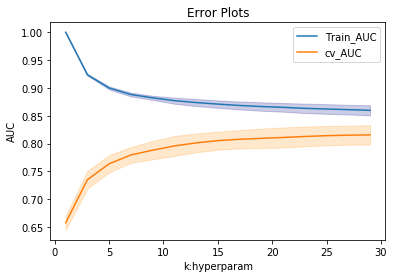

In [20]:
plt.plot(k,train_auc,label="Train_AUC")
plt.gca().fill_between(k,train_auc-train_auc_std,train_auc+train_auc_std,alpha=0.2,color='darkblue')

plt.plot(k,cv_auc,label="cv_AUC")
plt.gca().fill_between(k,cv_auc-cv_auc_std,cv_auc+cv_auc_std,alpha=0.2,color="darkorange")

plt.legend()
plt.xlabel("k:hyperparam")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.show()

In [21]:
#testing on test data

from sklearn.metrics import roc_curve,auc

knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_uni,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

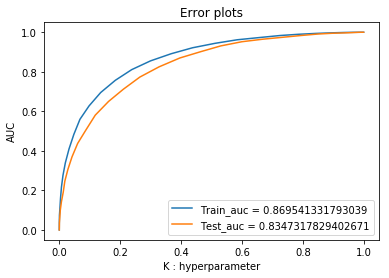

In [23]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,knn.predict_proba(X_train_uni)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,knn.predict_proba(X_test_uni)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC")
plt.title("Error plots")
plt.show()

In [24]:
print("confusion matrix on train data : ")
print(confusion_matrix(Y_train,knn.predict(X_train_uni)))

print("confusion matrix on test data : ")
print(confusion_matrix(Y_test,knn.predict(X_test_uni)))

confusion matrix on train data : 
[[13068  4081]
 [ 3376 14475]]
confusion matrix on test data : 
[[5773 2078]
 [1621 5528]]


## Kd-Tree

In [50]:
knn=KNeighborsClassifier(algorithm='kd_tree')
param_grid={'n_neighbors':np.arange(1,30,3)}
gsv=GridSearchCV(knn,param_grid,cv=tscv,verbose=1,scoring='roc_auc')
gsv.fit(X_train_uni_1,Y_train_1)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:  9.6min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [51]:
print("best hyperparameter : ",gsv.best_params_)

best hyperparameter :  {'n_neighbors': 49}


In [37]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']

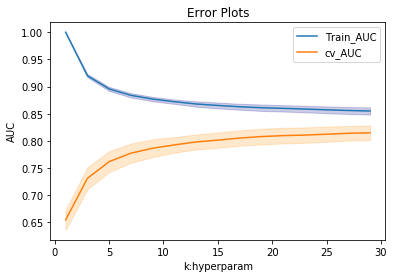

In [38]:
plt.plot(k,train_auc,label="Train_AUC")
plt.gca().fill_between(k,train_auc-train_auc_std,train_auc+train_auc_std,alpha=0.2,color='darkblue')

plt.plot(k,cv_auc,label="cv_AUC")
plt.gca().fill_between(k,cv_auc-cv_auc_std,cv_auc+cv_auc_std,alpha=0.2,color="darkorange")

plt.legend()
plt.xlabel("k:hyperparam")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.show()

In [39]:
#testing on test data

from sklearn.metrics import roc_curve,auc

knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train_uni_1,Y_train_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

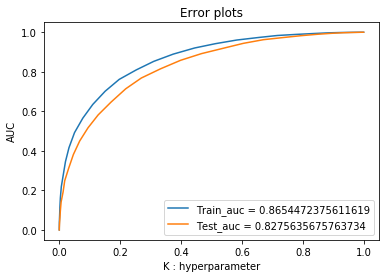

In [40]:
train_fpr,train_tpr,threshold=roc_curve(Y_train_1,knn.predict_proba(X_train_uni_1)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test_1,knn.predict_proba(X_test_uni_1)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("K : hyperparameter")
plt.ylabel("AUC")
plt.title("Error plots")
plt.show()

In [41]:
print("confusion matrix on train data : ")
print(confusion_matrix(Y_train_1,knn.predict(X_train_uni_1)))

print("confusion matrix on test data : ")
print(confusion_matrix(Y_test_1,knn.predict(X_test_uni_1)))

confusion matrix on train data : 
[[10207  3454]
 [ 2732 11607]]
confusion matrix on test data : 
[[4631 1708]
 [1311 4350]]
